**Importing all the dependencies**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data preprocessing**

In [2]:
# Loading the data into a pandas dataframe 

path = 'Copy of sonar data.csv'
data = pd.read_csv(path,header=None)

In [3]:
data.head(3) # checking the first 3 rows of the data set 

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [4]:
print(data.shape) # checking the size of the dataset. (208 rows and 61 colunms)

(208, 61)


In [5]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [7]:
data.describe() # checking statistical information about the dataset 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


**M - Mine  
R - Rock**

In [8]:
data.value_counts([60])

60
M     111
R      97
dtype: int64

C:\Users\Windows 10 Pro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


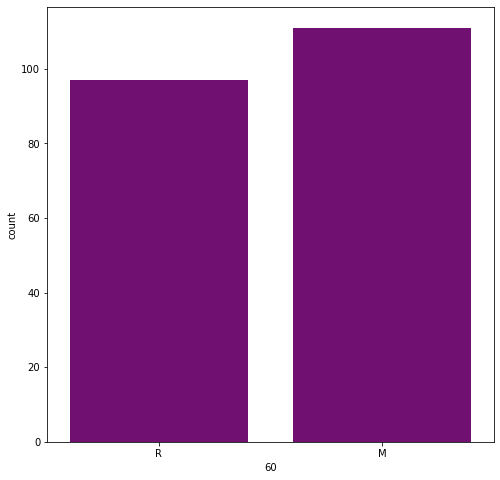

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(data[60], color='purple')
plt.show(' ')

In [10]:
data.groupby([60]).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


**Separating the features and the target in the data**

In [11]:
features = data.drop([60],axis=1)
target = data[60]

**Splitting the data into train and test**

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size=0.1,stratify=target, random_state=1)

In [13]:
print(features.shape,Xtrain.shape,Xtest.shape) # checking the size of the splitted training data

(208, 60) (187, 60) (21, 60)


In [14]:
print(target.shape,Ytrain.shape,Ytest.shape) # checking the size of the splitted testing data

(208,) (187,) (21,)


**Model Training**

In [15]:
Model = LogisticRegression() # creating the model oobject 

# fitting the data into the model for training 

Model.fit(Xtrain,Ytrain)

LogisticRegression()

**Evaluating the Model**

In [16]:
testing_prediction = Model.predict(Xtest)
testing_accuracy = metrics.accuracy_score(testing_prediction,Ytest)
print('The testing accuracy of the model is:',testing_accuracy)

The testing accuracy of the model is: 0.7619047619047619


In [17]:
training_prediction = Model.predict(Xtrain)
training_accuracy = metrics.accuracy_score(training_prediction,Ytrain)
print('The training accuracy of the model is:',training_accuracy)

The training accuracy of the model is: 0.8342245989304813


**Building a predictive system**

In [18]:
new_input_data = (0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,
                  0.0942,0.0794,0.0252,0.1191,0.1045,0.2050,0.1556,0.2690,0.3784,0.4024,
                  0.3470,0.1395,0.1208,0.2827,0.1500,0.2626,0.4468,0.7520,0.9036,0.7812,
                  0.4766,0.2483,0.5372,0.6279,0.3647,0.4572,0.6359,0.6474,0.5520,0.3253,
                  0.2292,0.0653,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,
                  0.0000,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111)
new_input_data_to_numpy_array = np.asarray(new_input_data) # coverting the new data into numpy array 
new_data = new_input_data_to_numpy_array.reshape(1,-1) # reshaping the data for one instance purpose

prediction = Model.predict(new_data)
print(prediction)

if (prediction[0] == 'R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')


['R']
The object is a Rock


In [19]:
new_input_data = (0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,
                  0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,
                  0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,
                  0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,
                  0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,
                  0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115)
new_input_data_to_numpy_array = np.asarray(new_input_data) # coverting the new data into numpy array 
new_data = new_input_data_to_numpy_array.reshape(1,-1) # reshaping the data for one instance purpose

prediction = Model.predict(new_data)
print(prediction)

if (prediction[0] == 'R'):
    print('The object is a Rock')
else:
    print('The object is a Mine')


['M']
The object is a Mine


**Thank You!**  
**Olatunde**